In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
from UsefulFunctions import LinReg
from UsefulFunctions import ScatPlotandReg
from UsefulFunctions import ScatPlotNoReg

# Analysis Summary

Healthcare is getting more expensive and spend is increasing year over year – no surprise there. But rather than just looking at total spend, we want to see where the spend was increasing. This segment looked at government program spending to understand if it was increasing year over year on a variety of levels.

We first looked at the total spend per capita by service and year.  Certain data sets were broken down by code, so we were able to understand not just if spend was increasing, but where. The year over year increase is consistent across programs, in some states more than others, with the top 3 areas of spend being Personal Health Care, Hospital Care, and Physician & Clinical Services.
We next looked at the spend by service at the government program level - Medicare and Medicaid. With clear data showing personal health spend was increasing, we wanted to look to see if we saw the same trend in government program spending.
Not only do you see the same upward trend, you can see sharper increases on Medicaid starting around 2014 (for those who need the extra financial support) vs. those on Medicare (those 65 & older) – Medicare is also increasing but at a steady pace.
Finally, diving one level deeper, we looked at the spend by state for government programs, you’ll notice both saw increases from 2010-2017, some states more than others. Key call out is that Medicaid is actually seeing a higher spend than Medicare, though Medicare is seeing sharper increases year over years.

One thing we wanted to look into that proved challenging because we didn’t have the data we needed to do it – there would be too many assumptions in the data we had, was overlay those on Medicare and Medicaid – if you’re on Medicare, there’s a chance you could be on Medicaid, but if you’re on Medicaid, it doesn’t necessarily mean you’re on Medicare.

# Import Cleaned Data

In [22]:
# Import spending CSVs: CMS Data
CaidAgg_df = pd.read_csv("SpendingData/MEDICAID_AGGREGATE20.CSV")
CaidEnroll_df = pd.read_csv("SpendingData/MEDICAID_ENROLLMENT20.CSV")
CaidPerEnroll_df = pd.read_csv("SpendingData/MEDICAID_PER_ENROLLEE20.CSV")
CareAgg_df = pd.read_csv("SpendingData/MEDICARE_AGGREGATE20.CSV")
CareEnroll_df = pd.read_csv("SpendingData/MEDICARE_ENROLLMENT20.CSV")
CarePerEnroll_df = pd.read_csv("SpendingData/MEDICARE_PER_ENROLLEE20.CSV")
PHIAgg_df = pd.read_csv("SpendingData/PHI_AGGREGATE20.CSV")
PHIEnroll_df = pd.read_csv("SpendingData/PHI_ENROLLMENT20.CSV")
PHIPerEnroll_df = pd.read_csv("SpendingData/PHI_PER_ENROLLEE20.CSV")
USPop_df = pd.read_csv("SpendingData/US_POPULATION20.CSV")
us_per_cap_df = pd.read_csv("SpendingData/US_PER_CAPITA20.CSV")

# Import population CSVs: Census Data
Age_Sex_df = pd.read_csv("CensusData/AgeAndSex.csv")
Income_df = pd.read_csv("CensusData/Income.csv")

#Trim spending CSVs into relavent time period (2010-2020)
CaidAgg_df = CaidAgg_df.dropna(how = 'any')
CaidEnroll_df = CaidEnroll_df.dropna(how = 'any')
CaidPerEnroll_df = CaidPerEnroll_df.dropna(how = 'any')
CareAgg_df = CareAgg_df.dropna(how = 'any')
CareEnroll_df = CareEnroll_df.dropna(how = 'any')
CarePerEnroll_df = CarePerEnroll_df.dropna(how = 'any')
PHIAgg_df = PHIAgg_df.dropna(how = 'any')
PHIEnroll_df = PHIEnroll_df.dropna(how = 'any')
PHIPerEnroll_df = PHIPerEnroll_df.dropna(how = 'any')
USPop_df = USPop_df.dropna(how = 'any')

#Find wanted columns for the spending CSVs
CSVCols = ["Y"+str(x) for x in range(2010,2018)]
CSVCols.insert(0,'State_Name')
CSVCols.append('Code')
CSVCols.append('Item')
TCaidAgg_df = CaidAgg_df[CSVCols]
TCaidEnroll_df = CaidEnroll_df[CSVCols]
TCaidPerEnroll_df = CaidPerEnroll_df[CSVCols]
TCareAgg_df = CareAgg_df[CSVCols]
TCareEnroll_df = CareEnroll_df[CSVCols]
TCarePerEnroll_df = CarePerEnroll_df[CSVCols]
TPHIAgg_df = PHIAgg_df[CSVCols]
TPHIEnroll_df = PHIEnroll_df[CSVCols]
TPHIPerEnroll_df = PHIPerEnroll_df[CSVCols]
USPop_df = USPop_df[CSVCols]
us_per_cap_df = us_per_cap_df[CSVCols]
TCaidAgg_df.to_csv("CleanedData/MedicadeAggregate.csv",index = False,header = True)
TCareAgg_df.to_csv("CleanedData/MedicareAggregate.csv",index = False,header = True)
TPHIAgg_df.to_csv("CleanedData/PHIAggregate.csv",index = False,header = True)
TCaidEnroll_df.to_csv("CleanedData/MedicadeEnroll.csv",index = False,header = True)
TCaidPerEnroll_df.to_csv("CleanedData/MedicadePerEnroll.csv",index = False,header = True)
TCareEnroll_df.to_csv("CleanedData/MedicareEnroll.csv",index = False,header = True)
TCarePerEnroll_df.to_csv("CleanedData/MedicarePerEnroll.csv",index = False,header = True)
TPHIEnroll_df.to_csv("CleanedData/PHIEnroll.csv",index = False,header = True)
TPHIPerEnroll_df.to_csv("CleanedData/PHIPerEnroll.csv",index = False,header = True)
USPop_df.to_csv("CleanedData/USPop.csv")

In [13]:
# Check dataframe example to make sure data needed is included, for the timeframes required
TCaidAgg_df.columns

Index(['State_Name', 'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015',
       'Y2016', 'Y2017', 'Code', 'Item'],
      dtype='object')

# Medicaid Spend Analysis

In [16]:
# Split data into groups based on State and Code, by Year
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2010_2017_caid = TCaidAgg_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_caid.head()

# Sum each code, by year, across all states
TCaidAgg_df_groupedbycode = TCaidAgg_df.groupby(['Code']).sum()

# Create DataFrame
TCaidAgg_df_groupedbycode_df = pd.DataFrame(TCaidAgg_df_groupedbycode)
TCaidAgg_df_groupedbycode_df

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
Code,,,,,,,,
1,365708,373685,388256,405663,446921,484507,503379,516068
2,142173,144348,150635,157074,171742,186098,190072,192230
3,43403,45323,47322,51895,64471,70071,73065,74914
4,4961,4788,4768,5068,5931,6776,7172,7166
5,8391,8455,8492,8719,9771,11231,11888,12219
6,25418,26533,27046,27800,29111,31462,32656,33585
7,20425,20780,21050,21163,25265,27681,29325,29406
8,4919,5102,5332,5689,6538,7298,7630,7795
9,46336,47648,47726,48107,49243,49755,50672,51314


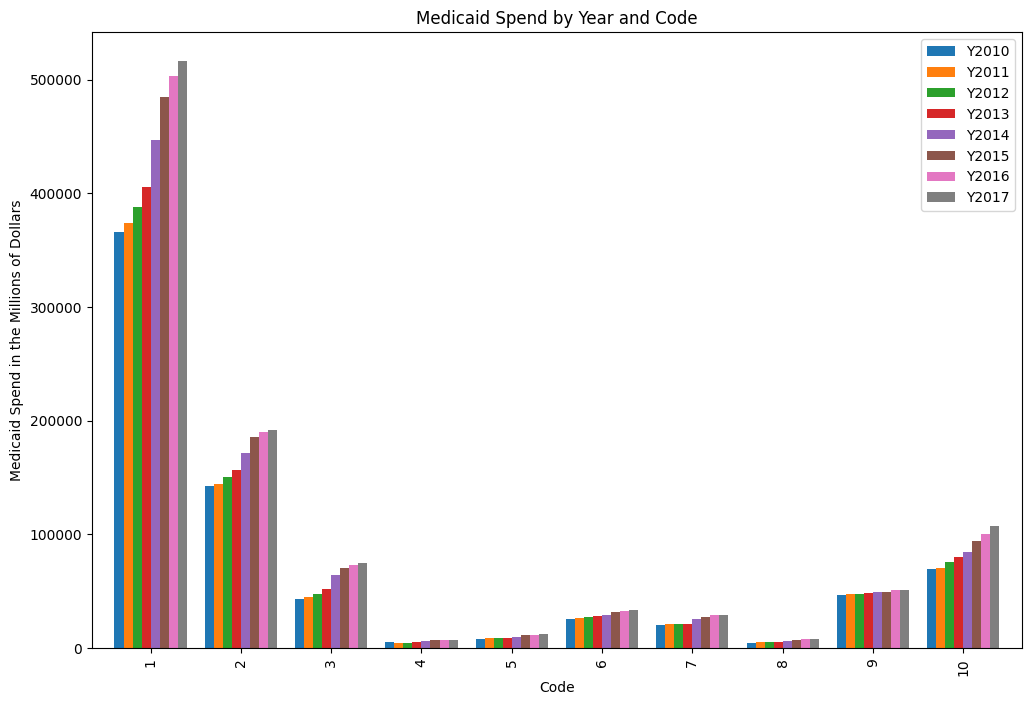

<Figure size 640x480 with 0 Axes>

In [17]:
# Plot bar graph by year and code
medicaid_year_bycode = TCaidAgg_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='Medicaid Spend by Year and Code')
medicaid_year_bycode.set_ylabel("Medicaid Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

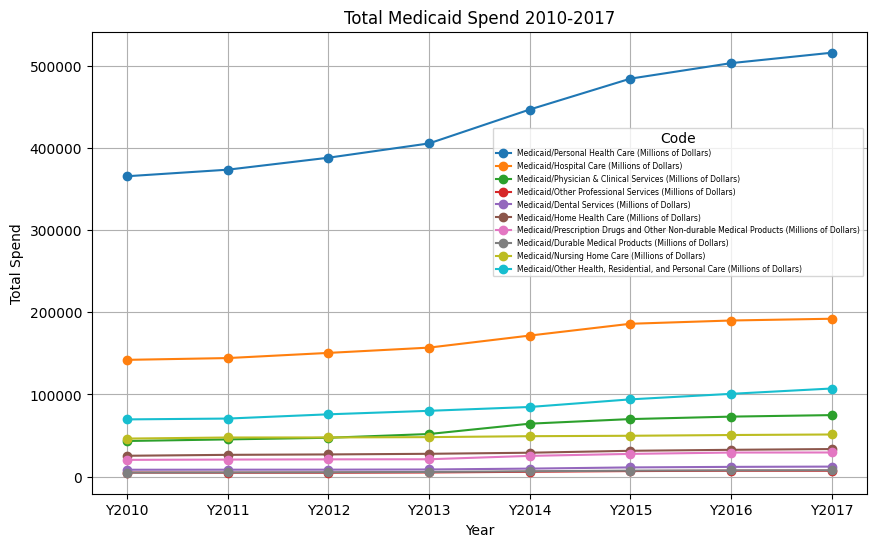

In [35]:
# Show US Per Capita spend in line graph to easily see by code
TCaidAgg_df_grouped = TCaidAgg_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = TCaidAgg_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in TCaidAgg_df_grouped.index:
    plt.plot(years, TCaidAgg_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total Medicaid Spend 2010-2017')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/MedicaidSpendbyCode_AllYears")
plt.show()

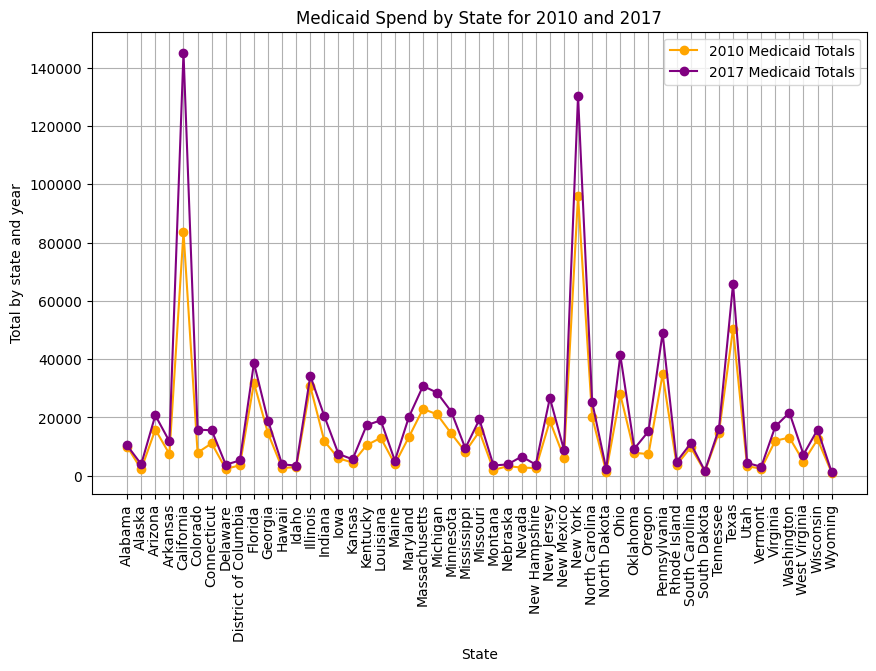

In [40]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2010_caid = TCaidAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_caid_df = pd.DataFrame(sum_2010_caid)

# Graph by state and code
sum_2010_caid_df = sum_2010_caid_df.groupby('State_Name').sum()
sum_2010_caid_df.sort_values(by='State_Name', ascending=True)
#sum_2010_caid_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('Medicaid Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TCaidAgg_df_grouped = TCaidAgg_df.groupby(['State_Name', 'Code'])
sum_2017_caid = TCaidAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_caid_df = pd.DataFrame(sum_2017_caid)

# Graph by state and code
sum_2017_caid_df = sum_2017_caid_df.groupby('State_Name').sum()
sum_2017_caid_df.sort_values(by='State_Name', ascending=True)
#sum_2017_caid_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('Medicaid Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_caid_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(sum_2017_caid_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicaid Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicaidSpendbyState_2010&2017")
plt.show()


In [62]:
# Show Population dataframe to see what columns to divide by

# Align indexes across dataframes to be State Name
#USPop_df.set_index("State_Name", inplace=True)
USPop_df.head()

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Code,Item
State_Name,,,,,,,,,,
Alabama,4786,4800,4817,4832,4844,4855,4867,4878,11,Population (Thousands)
Alaska,714,722,731,738,737,738,743,741,11,Population (Thousands)
Arizona,6407,6473,6556,6635,6733,6833,6945,7048,11,Population (Thousands)
Arkansas,2922,2941,2953,2960,2969,2980,2992,3004,11,Population (Thousands)
California,37320,37636,37945,38254,38587,38904,39149,39338,11,Population (Thousands)


In [59]:
# Show Total Medicaid Spend dataframe to see what columns to divide by
sum_2010_caid_df.head()

,Y2010
State_Name,
Alabama,10007
Alaska,2202
Arizona,15832
Arkansas,7464
California,83594


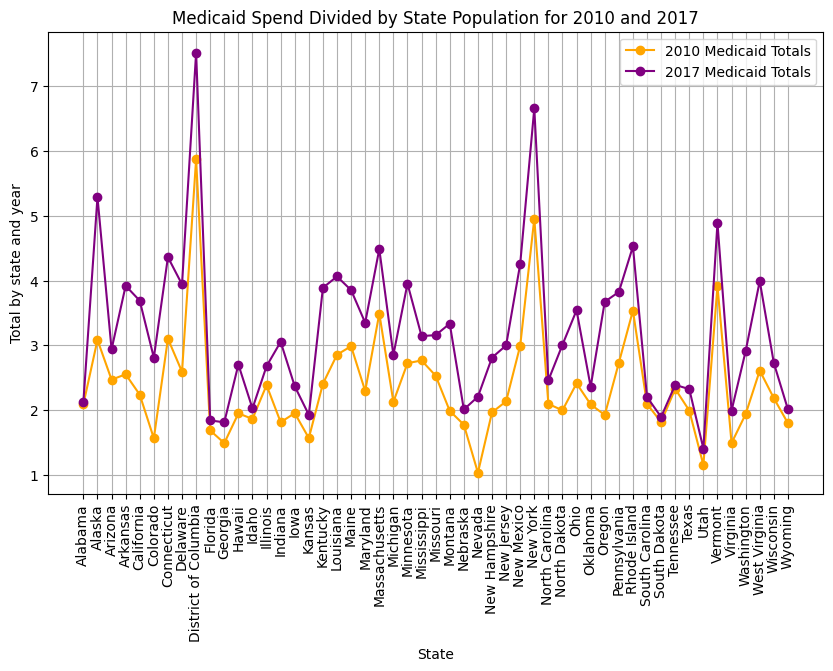

In [83]:
# Divide by US population by state in a given year to make sure we're comparing apples to apples

# Align indexes
#sum_2010_caid_df.set_index("State_Name", inplace=True)
#sum_2017_caid_df.set_index("State_Name", inplace=True)
#USPop_df.set_index("State_Name", inplace=True)

# Divide total spend by population for 2010
spend_div_pop_2010_caid = sum_2010_caid_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_caid_df = pd.DataFrame(spend_div_pop_2010_caid)

# Divide total spend by population for 2017
spend_div_pop_2017_caid = sum_2017_caid_df['Y2017'] / USPop_df['Y2017']
spend_div_pop_2017_caid_df = pd.DataFrame(spend_div_pop_2017_caid)


# GRAPH 4: Combine graphs above in 1 view and divide by population
plt.figure(figsize=(10,6))
plt.plot(spend_div_pop_2010_caid_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(spend_div_pop_2017_caid_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicaid Spend Divided by State Population for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicaidSpendbyStatePop_2010&2017")
plt.show()



# Medicare Spend Analysis

In [18]:
# Split data into groups based on State and Code, by Year
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2010_2017_care = TCareAgg_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_care.head()

# Sum each code, by year, across all states
TCareAgg_df_groupedbycode = TCareAgg_df.groupby(['Code']).sum()

# Create DataFrame
TCareAgg_df_groupedbycode_df = pd.DataFrame(TCareAgg_df_groupedbycode)
TCareAgg_df_groupedbycode_df

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
Code,,,,,,,,
1,488818,511846,533640,553569,579473,606245,628876,659001
2,220761,227734,237964,246273,253531,261798,273932,286480
3,118153,124870,131250,135659,142325,149332,154493,164049
4,14066,15128,16248,17453,18716,20221,21242,23222
5,241,293,365,478,407,461,509,865
6,31718,32205,33537,33669,34297,35850,37169,38451
7,59302,63393,67214,72470,81733,88634,92004,95490
8,7506,7530,8087,7804,7778,7950,7633,8099
9,32287,35741,33884,34618,35498,36965,37004,37405


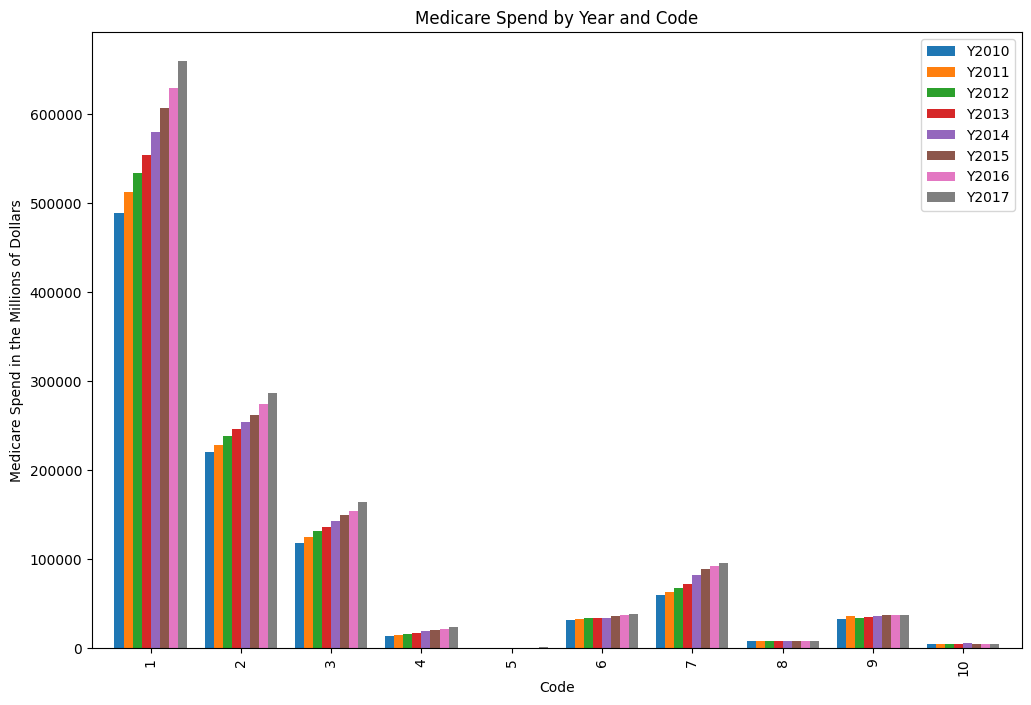

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot bar graph by year and code
medicare_year_bycode = TCareAgg_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='Medicare Spend by Year and Code')
medicare_year_bycode.set_ylabel("Medicare Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

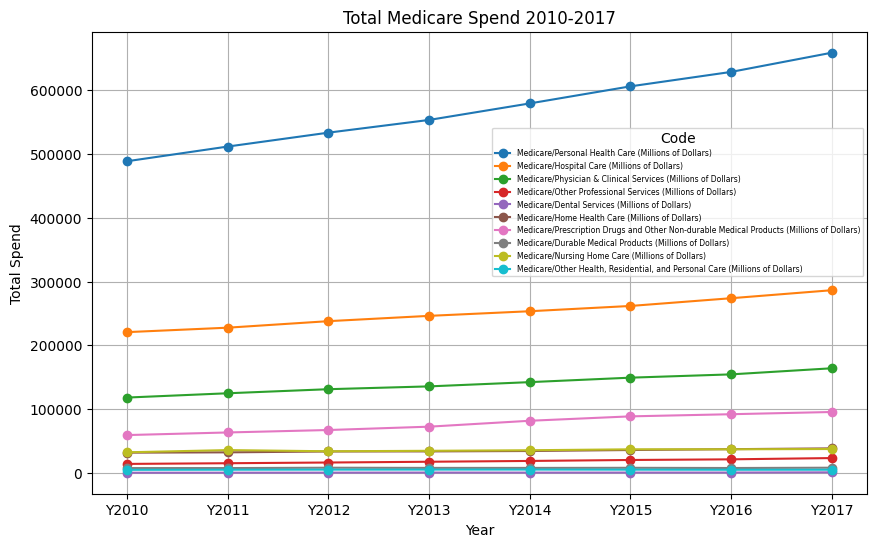

In [34]:
# Show US Per Capita spend in line graph to easily see by code
TCareAgg_df_grouped = TCareAgg_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = TCareAgg_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in TCareAgg_df_grouped.index:
    plt.plot(years, TCareAgg_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total Medicare Spend 2010-2017')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/MedicareSpendbyCode_AllYears")
plt.show()

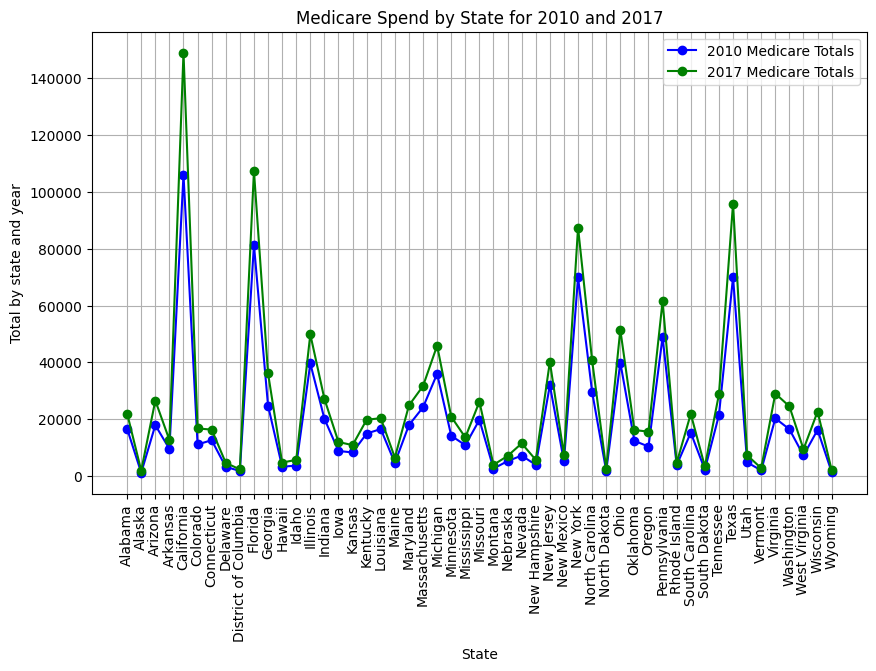

In [42]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2010_care = TCareAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_care_df = pd.DataFrame(sum_2010_care)

# Graph by state and code
sum_2010_care_df = sum_2010_care_df.groupby('State_Name').sum()
sum_2010_care_df.sort_values(by='State_Name', ascending=True)
#sum_2010_care_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('Medicare Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TCareAgg_df_grouped = TCareAgg_df.groupby(['State_Name', 'Code'])
sum_2017_care = TCareAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_care_df = pd.DataFrame(sum_2017_care)

# Graph by state and code
sum_2017_care_df = sum_2017_care_df.groupby('State_Name').sum()
sum_2017_care_df.sort_values(by='State_Name', ascending=True)
#sum_2017_care_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('Medicare Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_care_df['Y2010'], marker='o', label='2010 Medicare Totals', color='blue')
plt.plot(sum_2017_care_df['Y2017'], marker='o', label='2017 Medicare Totals', color='green')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('Medicare Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicareSpendbyState_2010&2017")
plt.show()


In [72]:
# Show calculation dividing Medicare state totals by state population in a given year

spend_div_pop_2010_care = sum_2010_care_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_care_df = pd.DataFrame(spend_div_pop_2010_care)
spend_div_pop_2010_care_df.head()

,Y2010
State_Name,
Alabama,3.468868
Alaska,1.575630
Arizona,2.790698
Arkansas,3.251198
California,2.840675


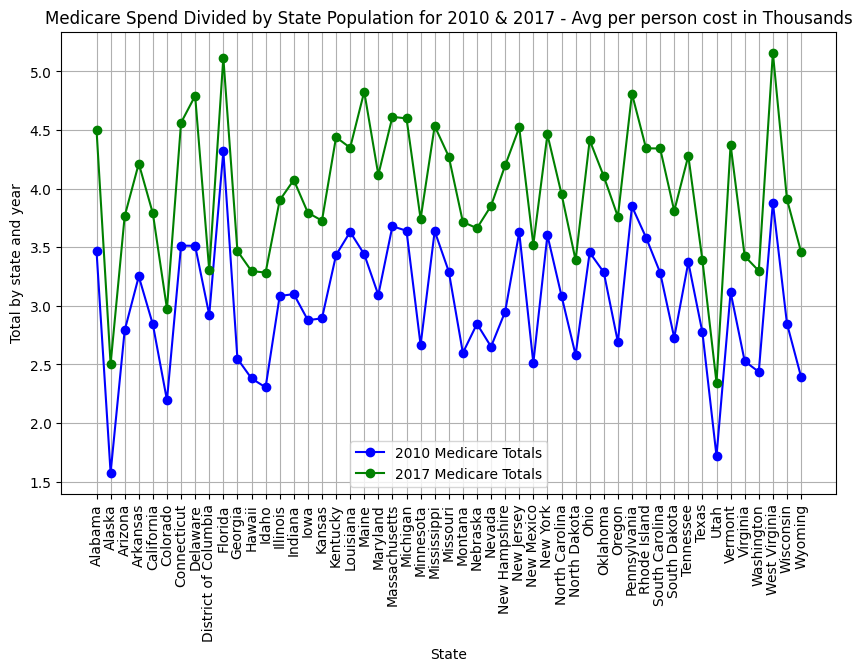

In [103]:
# Divide by US population by state in a given year to make sure we're comparing apples to apples

# Divide total spend by population for 2010
spend_div_pop_2010_care = sum_2010_care_df['Y2010'] / USPop_df['Y2010']
spend_div_pop_2010_care_df = pd.DataFrame(spend_div_pop_2010_care)

# Divide total spend by population for 2017
spend_div_pop_2017_care = sum_2017_care_df['Y2017'] / USPop_df['Y2017']
spend_div_pop_2017_care_df = pd.DataFrame(spend_div_pop_2017_care)


# GRAPH 4: Combine graphs above in 1 view and divide by population
plt.figure(figsize=(10,6))
plt.plot(spend_div_pop_2010_care_df['Y2010'], marker='o', label='2010 Medicare Totals', color='blue')
plt.plot(spend_div_pop_2017_care_df['Y2017'], marker='o', label='2017 Medicare Totals', color='green')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Note population and totals in thousands; the below shows the avg per person cost
# Add title, axis labels, add grid, and show
plt.title('Medicare Spend Divided by State Population for 2010 & 2017 - Avg per person cost in Thousands')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/MedicareSpendbyStatePop_2010&2017")
plt.show()


# US Per Capita Spend Analysis

In [23]:
# Split data into groups based on State and Code, by Year
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2010_2017_us_cap = us_per_cap_df_grouped[["Y2010", "Y2011","Y2012","Y2013","Y2014","Y2015","Y2016","Y2017"]].sum()
sum_2010_2017_us_cap.head()

# Sum each code, by year, across all states
us_per_cap_df_groupedbycode = us_per_cap_df.groupby(['Code']).sum()

# Create DataFrame
us_per_cap_df_groupedbycode_df = pd.DataFrame(us_per_cap_df_groupedbycode)
us_per_cap_df_groupedbycode_df

,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
Code,,,,,,,,
1,434920,446961,461782,470383,490806,514867,534015,551765
2,166920,171218,178325,183007,188965,197624,205324,213375
3,98277,102312,105746,106997,111483,117629,123909,129455
4,13839,14444,15183,15470,16293,17243,18138,18934
5,21209,21526,21794,22110,22703,23611,24837,25433
6,12138,12899,13486,13908,14533,15276,15906,16773
7,58664,59622,60428,60773,66367,70322,70289,70608
8,7854,7938,8414,8674,8918,9241,9516,9655
9,28110,28756,29033,29131,29609,30176,31148,31227


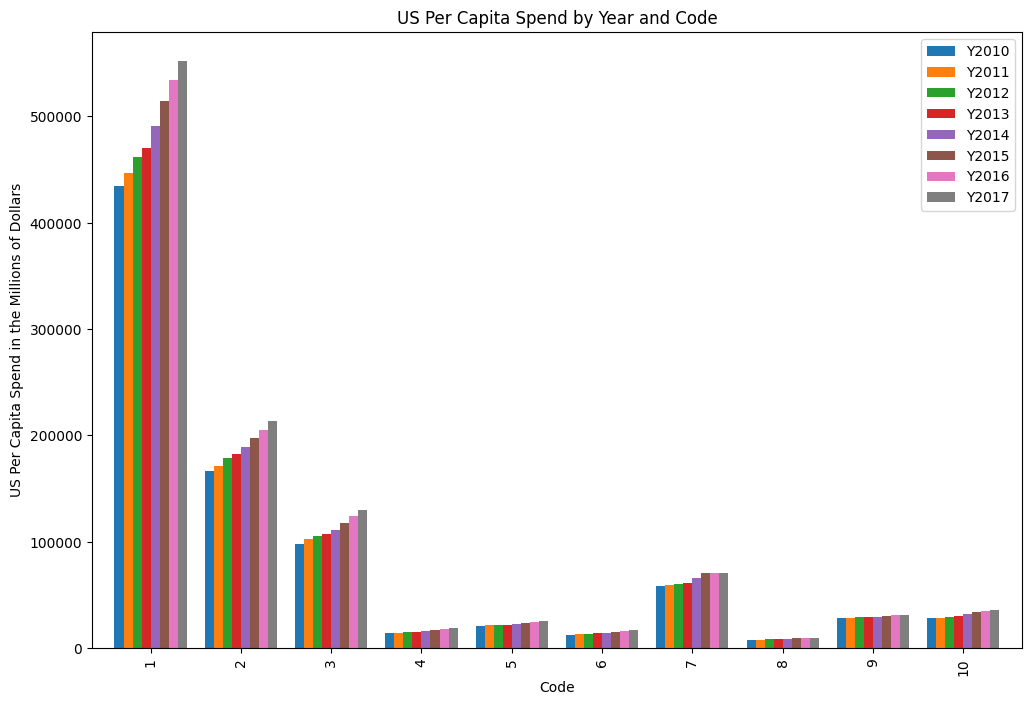

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot bar graph by year and code
us_per_cap_year_bycode = us_per_cap_df_groupedbycode.plot(kind='bar', figsize=(12,8), width=0.8, title='US Per Capita Spend by Year and Code')
us_per_cap_year_bycode.set_ylabel("US Per Capita Spend in the Millions of Dollars")
plt.show()
plt.tight_layout()

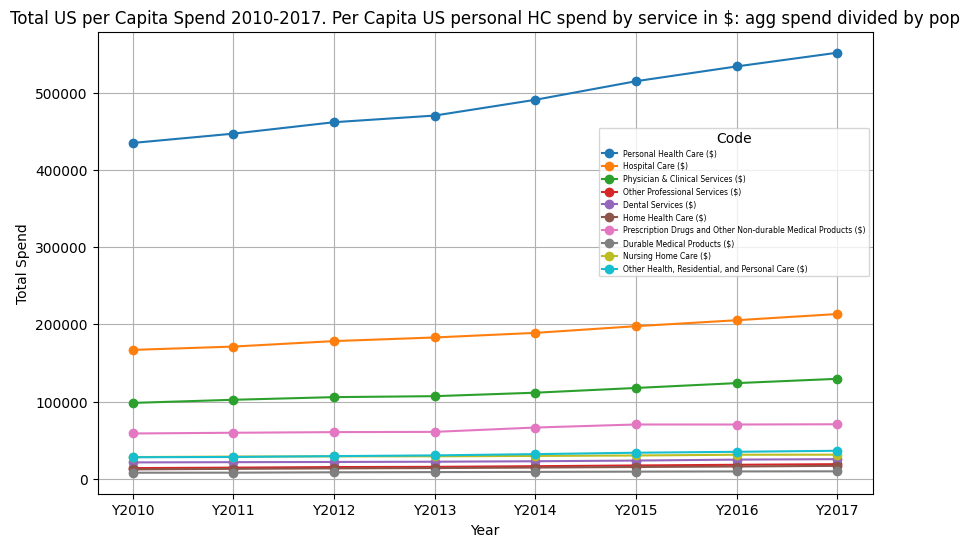

In [33]:
# Show US Per Capita spend in line graph to easily see by code
us_per_cap_df_grouped = us_per_cap_df.groupby('Code').sum()

# Plot data on graph
years = ['Y2010','Y2011','Y2012','Y2013','Y2014','Y2015','Y2016','Y2017']
plt.figure(figsize=(10,6))

# After seeing the legened did not connect the code # to the description, connecting those fields so it's clear on the graph what each code number represents in the legend
code_item_description = us_per_cap_df[['Code', 'Item']].drop_duplicates().set_index('Code')['Item']

# Create For Loop to loop through all the codes and plot totals by year
for code in us_per_cap_df_grouped.index:
    plt.plot(years, us_per_cap_df_grouped.loc[code, years], marker='o', label=code_item_description[code])

# Label graph and position legend so it doesn't overlap the data on the graph
plt.title('Total US per Capita Spend 2010-2017. Per Capita US personal HC spend by service in $: agg spend divided by pop')
plt.xlabel('Year')
plt.ylabel('Total Spend')
plt.legend(title='Code', fontsize=5.5, loc='upper right', bbox_to_anchor=(1,.8))
plt.grid(True)
plt.savefig(f"Graphs/USPerCapSpendbyCode_AllYears")
plt.show()

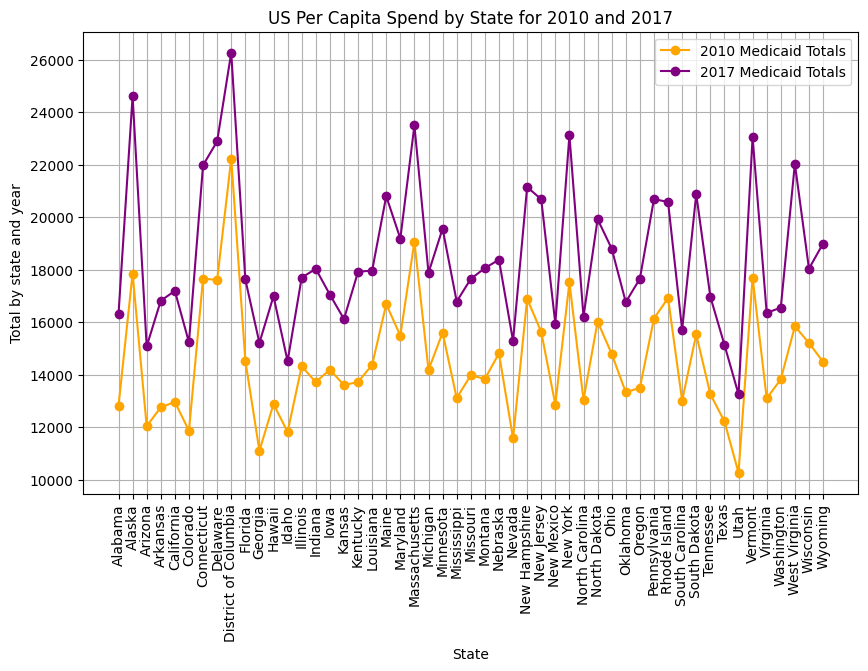

In [43]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2010_us_per_cap = us_per_cap_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_us_per_cap_df = pd.DataFrame(sum_2010_us_per_cap)

# Graph by state and code
sum_2010_us_per_cap_df = sum_2010_us_per_cap.groupby('State_Name').sum()
sum_2010_us_per_cap_df.sort_values(by='State_Name', ascending=True)
#sum_2010_us_per_cap_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
#plt.title('US Per Capita Total Service Spend by state in 2010')
#plt.xlabel('State Name')
#plt.ylabel('Y2010')
#plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
us_per_cap_df_grouped = us_per_cap_df.groupby(['State_Name', 'Code'])
sum_2017_us_per_cap = us_per_cap_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_us_per_cap_df = pd.DataFrame(sum_2017_us_per_cap)

# Graph by state and code
sum_2017_us_per_cap_df = sum_2017_us_per_cap_df.groupby('State_Name').sum()
sum_2017_us_per_cap_df.sort_values(by='State_Name', ascending=True)
#sum_2017_us_per_cap_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
#plt.title('US Per Capita Total Service Spend by state in 2017')
#plt.xlabel('State Name')
#plt.ylabel('Y2017')
#plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_us_per_cap_df['Y2010'], marker='o', label='2010 Medicaid Totals', color='orange')
plt.plot(sum_2017_us_per_cap_df['Y2017'], marker='o', label='2017 Medicaid Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()

# Add title, axis labels, add grid, and show
plt.title('US Per Capita Spend by State for 2010 and 2017')
plt.xlabel('State')
plt.ylabel('Total by state and year')
plt.grid(True)
plt.tight_layout
plt.savefig(f"Graphs/USPerCapSpendbyState_2010&2017")
plt.show()


# Private Healthcare Spending

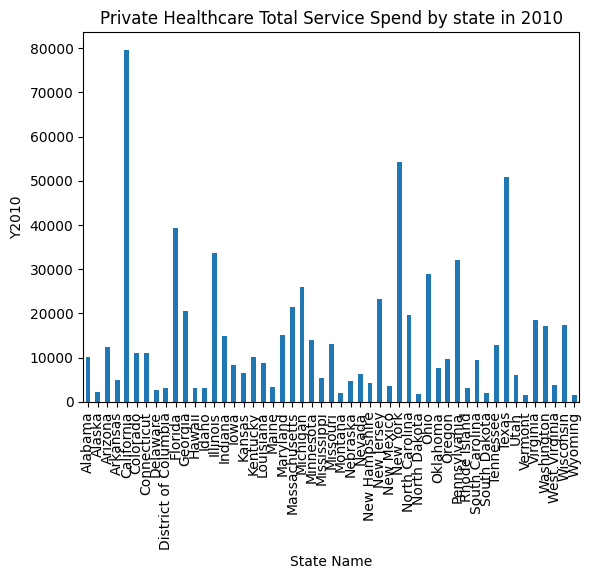

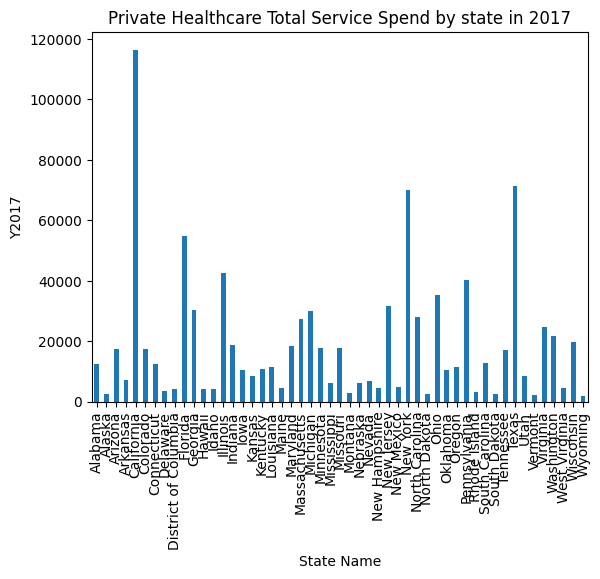

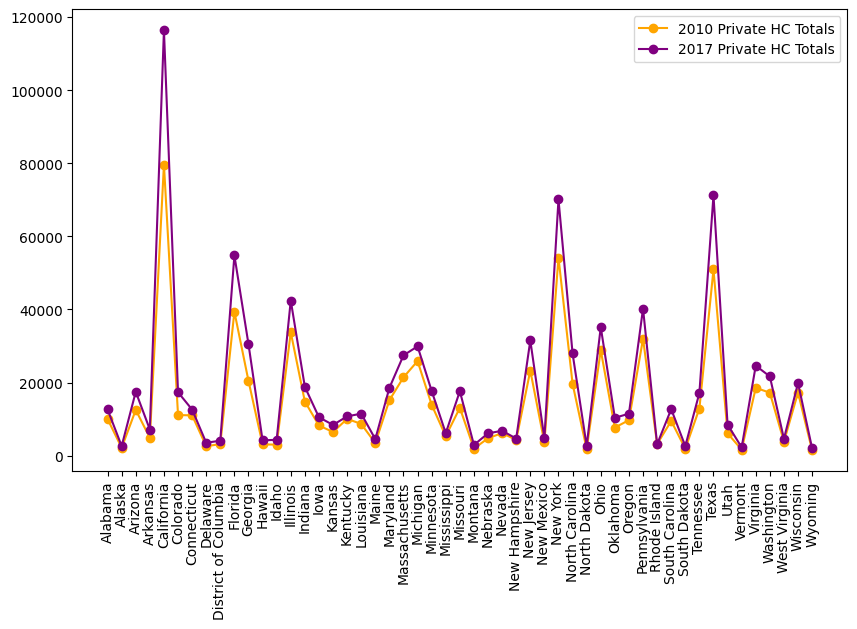

In [102]:
# Graph and look at data at the state level, for an individual year
# GRAPH 1: Split data into groups based on State and Code, by year
TPHIAgg_df_grouped = TPHIAgg_df.groupby(['State_Name'])
sum_2010_phi = TPHIAgg_df_grouped[["Y2010"]].sum()

# Turn into a dataframe
sum_2010_phi_df = pd.DataFrame(sum_2010_phi)

# Graph by state and year
sum_2010_phi_df = sum_2010_phi_df.groupby('State_Name').sum()
sum_2010_phi_df.sort_values(by='State_Name', ascending=True)
sum_2010_phi_df['Y2010'].plot(kind='bar')

# GRAPH 1: Add title, label axis, and show graph
plt.title('Private Healthcare Total Service Spend by state in 2010')
plt.xlabel('State Name')
plt.ylabel('Y2010')
plt.show()

# GRAPH 2: Add a 2017 graph following the same method above
TPHIAgg_df_grouped = TPHIAgg_df.groupby(['State_Name'])
sum_2017_phi = TPHIAgg_df_grouped[["Y2017"]].sum()

# Turn into a dataframe
sum_2017_phi_df = pd.DataFrame(sum_2017_phi)

# Graph by state and code
sum_2017_phi_df = sum_2017_phi_df.groupby('State_Name').sum()
sum_2017_phi_df.sort_values(by='State_Name', ascending=True)
sum_2017_phi_df['Y2017'].plot(kind='bar')

# Add title, label axis, and show graph
plt.title('Private Healthcare Total Service Spend by state in 2017')
plt.xlabel('State Name')
plt.ylabel('Y2017')
plt.show()

# GRAPH 3: Combine graphs above in 1 view
plt.figure(figsize=(10,6))
plt.plot(sum_2010_phi_df['Y2010'], marker='o', label='2010 Private HC Totals', color='orange')
plt.plot(sum_2017_phi_df['Y2017'], marker='o', label='2017 Private HC Totals', color='purple')

# Rotate x-axis ticks to 90 degrees so you can read each state
plt.xticks(rotation=90)

# Add legend so you know which data set is 2010 vs. 2017
plt.legend()
plt.savefig(f"Graphs/USPrivateHCSpendbyState_2010&2017")
